In [1]:
import pandas as pd
import re
import numpy as np
import string
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse import hstack
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from pycaret.classification import setup, compare_models, predict_model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from pycaret.classification import *
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Run this cell if you want to continue with experiment 3.2
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/GEMET_UNESCO_Data_All_Included_Non-translated_and_Translated.csv")

In [4]:
data

,Unnamed: 0,dataset,title,keywords,description,theme,combined,Detected Language,Translated
0,0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,SOCI,Population in group establishments by Province...,en,Population in group establishments by Province...
1,1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,TECH,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...
2,2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",GOVE,Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...
3,3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,ECON,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...
4,4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,SOCI,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...
...,...,...,...,...,...,...,...,...,...
40872,40872,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,TRAN,traffic noise traffic noise control traffic on...,NaN,traffic noise traffic noise control traffic on...
40873,40873,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,TRAN,tunnel tween-deck tanker twin-hull craft under...,NaN,tunnel tween-deck tanker twin-hull craft under...
40874,40874,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,TRAN,Carpentry Chemical technology Cloning Containe...,NaN,Carpentry Chemical technology Cloning Containe...
40875,40875,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,TRAN,Marine engineering Materials engineering Mater...,NaN,Marine engineering Materials engineering Mater...


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40872,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,NaN,traffic noise traffic noise control traffic on...,0,0,0,0,0,0,0,0,0,0,0,0,1
40873,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,NaN,tunnel tween-deck tanker twin-hull craft under...,0,0,0,0,0,0,0,0,0,0,0,0,1
40874,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,NaN,Carpentry Chemical technology Cloning Containe...,0,0,0,0,0,0,0,0,0,0,0,0,1
40875,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,NaN,Marine engineering Materials engineering Mater...,0,0,0,0,0,0,0,0,0,0,0,0,1


#### 3.1. GEMET +UNESCO Thesauri with Experiment 1(Non Translated data)

##### 3.1- Machine Learning Models with **UNI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()

<ipython-input-9-76b1aae063df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()


In [ ]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'Translated'], axis=1)

In [ ]:
data

,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
nltk.download('words')
english_words = set(words.words())

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  

    # #remove non-english tokens
    # tokens=  [token for token in tokens if token in english_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    return " ".join(words)

# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_combined"] = data["combined"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [ ]:
data[["combined","Preprocessed_combined"]]

,combined,Preprocessed_combined
0,Ability Achievement motivation Aptitude Attitu...,ability achievement motivation aptitude attitu...
1,Accounting Balance of payments Balance of trad...,accounting balance payment balance trade bank ...
2,Administrative tribunals Arbitration Artistic ...,administrative tribunal arbitration artistic p...
3,Africa alignment alluvial plain altitude Ameri...,africa alignment alluvial plain altitude ameri...
4,Afrikaans Albanian Altaic languages Amerindian...,afrikaans albanian altaic language amerindian ...
...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sport resort wood woodland ecosystem wo...
30477,working population engaged in agriculture work...,working population engaged agriculture workpla...
30478,working population engaged in agriculture work...,working population engaged agriculture workpla...
30479,working population engaged in agriculture work...,working population engaged agriculture workpla...


In [ ]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_combined"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [ ]:
# split the data using the train test split function the split ratio can be differen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(21336, 9145)

In [ ]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(21336, 9145)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

30443

In [ ]:
print(Uni_gram_features.sum().sort_values(ascending=False).head(100))

year          939.936738
de            853.011177
population    701.191010
sex           683.824345
education     543.902032
                 ...    
time          146.789167
living        145.595604
edad          145.066083
graduate      143.068505
occupation    142.850927
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

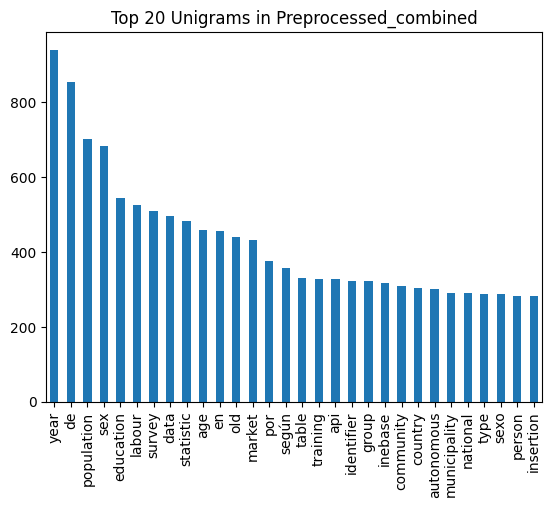

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.5123%
              precision    recall  f1-score   support

           0       0.43      0.96      0.59        52
           1       0.93      0.99      0.96      2184
           2       0.91      1.00      0.95      1040
           3       0.69      0.99      0.82       180
           4       0.90      0.96      0.93      1670
           5       0.79      0.97      0.87       702
           6       0.84      0.99      0.91       595
           7       0.61      1.00      0.76        97
           8       0.77      0.99      0.87       164
           9       0.89      0.99      0.94       699
          10       0.94      0.99      0.97      2289
          11       0.86      0.97      0.91      1268
          12       0.40      0.95      0.56        38

   micro avg       0.88      0.98      0.93     10978
   macro avg       0.77      0.98      0.85     10978
weighted avg       0.89      0.98      0.93     10978
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 92.2690%
              precision    recall  f1-score   support

           0       0.65      0.86      0.74        88
           1       0.96      0.99      0.97      2265
           2       0.95      0.99      0.97      1096
           3       0.86      0.99      0.92       225
           4       0.94      0.97      0.95      1715
           5       0.87      0.96      0.92       786
           6       0.92      0.98      0.95       661
           7       0.72      0.97      0.83       118
           8       0.87      0.97      0.92       190
           9       0.91      0.99      0.94       717
          10       0.97      0.99      0.98      2344
          11       0.92      0.97      0.94      1375
          12       0.71      0.91      0.80        70

   micro avg       0.93      0.98      0.95     11650
   macro avg       0.87      0.96      0.91     11650
weighted avg       0.93      0.98      0.95     11650
 samples avg       0.94      0.95      0.94     11650





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.5446%
              precision    recall  f1-score   support

           0       0.09      0.77      0.15        13
           1       0.87      0.96      0.91      2109
           2       0.82      0.97      0.89       974
           3       0.65      0.99      0.78       169
           4       0.89      0.91      0.90      1736
           5       0.69      0.97      0.80       614
           6       0.66      0.99      0.79       471
           7       0.60      0.98      0.75        97
           8       0.19      0.95      0.32        43
           9       0.75      0.99      0.86       592
          10       0.91      0.96      0.93      2276
          11       0.77      0.93      0.85      1190
          12       0.00      0.00      0.00         1

   micro avg       0.80      0.95      0.87     10285
   macro avg       0.61      0.87      0.69     10285
weighted avg       0.83      0.95      0.88     10285
 samples avg       0.81      0.82      0.81     10285





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.5123%
              precision    recall  f1-score   support

           0       0.43      0.96      0.59        52
           1       0.93      0.99      0.96      2184
           2       0.91      1.00      0.95      1040
           3       0.69      0.99      0.82       180
           4       0.90      0.96      0.93      1670
           5       0.79      0.97      0.87       702
           6       0.84      0.99      0.91       595
           7       0.61      1.00      0.76        97
           8       0.77      0.99      0.87       164
           9       0.89      0.99      0.94       699
          10       0.94      0.99      0.97      2289
          11       0.86      0.97      0.91      1268
          12       0.40      0.95      0.56        38

   micro avg       0.88      0.98      0.93     10978
   macro avg       0.77      0.98      0.85     10978
weighted avg       0.89      0.98      0.93     10978
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 92.2690%
              precision    recall  f1-score   support

           0       0.65      0.86      0.74        88
           1       0.96      0.99      0.97      2265
           2       0.95      0.99      0.97      1096
           3       0.86      0.99      0.92       225
           4       0.94      0.97      0.95      1715
           5       0.87      0.96      0.92       786
           6       0.92      0.98      0.95       661
           7       0.72      0.97      0.83       118
           8       0.87      0.97      0.92       190
           9       0.91      0.99      0.94       717
          10       0.97      0.99      0.98      2344
          11       0.92      0.97      0.94      1375
          12       0.71      0.91      0.80        70

   micro avg       0.93      0.98      0.95     11650
   macro avg       0.87      0.96      0.91     11650
weighted avg       0.93      0.98      0.95     11650
 samples avg       0.94      0.95      0.94     11650





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.5446%
              precision    recall  f1-score   support

           0       0.09      0.77      0.15        13
           1       0.87      0.96      0.91      2109
           2       0.82      0.97      0.89       974
           3       0.65      0.99      0.78       169
           4       0.89      0.91      0.90      1736
           5       0.69      0.97      0.80       614
           6       0.66      0.99      0.79       471
           7       0.60      0.98      0.75        97
           8       0.19      0.95      0.32        43
           9       0.75      0.99      0.86       592
          10       0.91      0.96      0.93      2276
          11       0.77      0.93      0.85      1190
          12       0.00      0.00      0.00         1

   micro avg       0.80      0.95      0.87     10285
   macro avg       0.61      0.87      0.69     10285
weighted avg       0.83      0.95      0.88     10285
 samples avg       0.81      0.82      0.81     10285





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 3.1.2 Machine Learning Models with Uni+Bigrams

In [ ]:
uni_bigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

280834

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.8868%
              precision    recall  f1-score   support

           0       0.18      0.91      0.30        23
           1       0.91      0.98      0.94      2182
           2       0.87      0.99      0.93      1007
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.91      1694
           5       0.75      0.95      0.84       677
           6       0.80      0.99      0.89       574
           7       0.59      1.00      0.75        94
           8       0.61      0.99      0.76       131
           9       0.83      0.99      0.90       652
          10       0.93      0.95      0.94      2368
          11       0.83      0.96      0.89      1242
          12       0.33      0.94      0.49        32

   micro avg       0.85      0.96      0.90     10853
   macro avg       0.71      0.97      0.80     10853
weighted avg       0.87      0.96      0.91     10853
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 88.2777%
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        81
           1       0.95      0.98      0.97      2282
           2       0.95      0.99      0.97      1100
           3       0.85      0.97      0.90       226
           4       0.93      0.94      0.94      1743
           5       0.86      0.95      0.90       785
           6       0.89      0.96      0.93       651
           7       0.66      1.00      0.80       105
           8       0.86      0.98      0.92       187
           9       0.88      0.98      0.92       700
          10       0.95      0.94      0.94      2422
          11       0.92      0.95      0.94      1390
          12       0.70      0.84      0.76        75

   micro avg       0.92      0.96      0.94     11747
   macro avg       0.85      0.95      0.89     11747
weighted avg       0.92      0.96      0.94     11747
 samples avg       0.93      0.93      0.92     11747





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 56.5664%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.98      0.85      1780
           2       0.81      1.00      0.89       924
           3       0.64      1.00      0.78       166
           4       0.74      0.99      0.85      1331
           5       0.41      0.99      0.58       355
           6       0.22      0.99      0.36       155
           7       0.15      1.00      0.26        24
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50       258
          10       0.73      1.00      0.85      1767
          11       0.50      1.00      0.66       714
          12       0.00      0.00      0.00         0

   micro avg       0.60      0.99      0.75      7474
   macro avg       0.41      0.77      0.51      7474
weighted avg       0.68      0.99      0.80      7474
 samples avg       0.60      0.64      0.62      7474





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.8868%
              precision    recall  f1-score   support

           0       0.18      0.91      0.30        23
           1       0.91      0.98      0.94      2182
           2       0.87      0.99      0.93      1007
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.91      1694
           5       0.75      0.95      0.84       677
           6       0.80      0.99      0.89       574
           7       0.59      1.00      0.75        94
           8       0.61      0.99      0.76       131
           9       0.83      0.99      0.90       652
          10       0.93      0.95      0.94      2368
          11       0.83      0.96      0.89      1242
          12       0.33      0.94      0.49        32

   micro avg       0.85      0.96      0.90     10853
   macro avg       0.71      0.97      0.80     10853
weighted avg       0.87      0.96      0.91     10853
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 88.2777%
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        81
           1       0.95      0.98      0.97      2282
           2       0.95      0.99      0.97      1100
           3       0.85      0.97      0.90       226
           4       0.93      0.94      0.94      1743
           5       0.86      0.95      0.90       785
           6       0.89      0.96      0.93       651
           7       0.66      1.00      0.80       105
           8       0.86      0.98      0.92       187
           9       0.88      0.98      0.92       700
          10       0.95      0.94      0.94      2422
          11       0.92      0.95      0.94      1390
          12       0.70      0.84      0.76        75

   micro avg       0.92      0.96      0.94     11747
   macro avg       0.85      0.95      0.89     11747
weighted avg       0.92      0.96      0.94     11747
 samples avg       0.93      0.93      0.92     11747





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 56.5664%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.98      0.85      1780
           2       0.81      1.00      0.89       924
           3       0.64      1.00      0.78       166
           4       0.74      0.99      0.85      1331
           5       0.41      0.99      0.58       355
           6       0.22      0.99      0.36       155
           7       0.15      1.00      0.26        24
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50       258
          10       0.73      1.00      0.85      1767
          11       0.50      1.00      0.66       714
          12       0.00      0.00      0.00         0

   micro avg       0.60      0.99      0.75      7474
   macro avg       0.41      0.77      0.51      7474
weighted avg       0.68      0.99      0.80      7474
 samples avg       0.60      0.64      0.62      7474





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 3.1.3 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

645748

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.5954%
              precision    recall  f1-score   support

           0       0.10      0.92      0.18        13
           1       0.91      0.96      0.93      2217
           2       0.86      0.99      0.92      1000
           3       0.67      0.99      0.80       174
           4       0.90      0.92      0.91      1721
           5       0.74      0.94      0.83       676
           6       0.79      0.99      0.88       563
           7       0.59      1.00      0.74        93
           8       0.56      0.99      0.72       120
           9       0.83      0.99      0.90       651
          10       0.92      0.89      0.90      2480
          11       0.80      0.95      0.87      1219
          12       0.32      0.94      0.48        31

   micro avg       0.84      0.94      0.89     10958
   macro avg       0.69      0.96      0.77     10958
weighted avg       0.86      0.94      0.90     10958
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 83.2586%
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        83
           1       0.95      0.96      0.95      2329
           2       0.95      0.96      0.95      1136
           3       0.85      0.87      0.86       253
           4       0.94      0.93      0.93      1780
           5       0.88      0.92      0.90       823
           6       0.89      0.95      0.92       660
           7       0.65      1.00      0.78       102
           8       0.85      0.97      0.91       187
           9       0.88      0.97      0.92       703
          10       0.94      0.84      0.89      2706
          11       0.91      0.94      0.92      1398
          12       0.70      0.78      0.74        81

   micro avg       0.92      0.92      0.92     12241
   macro avg       0.85      0.92      0.88     12241
weighted avg       0.92      0.92      0.92     12241
 samples avg       0.93      0.90      0.91     12241





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.9289%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.70      0.98      0.82      1661
           2       0.80      1.00      0.89       920
           3       0.62      1.00      0.77       161
           4       0.68      0.99      0.80      1208
           5       0.36      0.99      0.53       314
           6       0.12      0.99      0.22        86
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.29      1.00      0.45       228
          10       0.67      1.00      0.80      1611
          11       0.40      1.00      0.58       582
          12       0.00      0.00      0.00         0

   micro avg       0.55      0.99      0.71      6771
   macro avg       0.36      0.69      0.45      6771
weighted avg       0.64      0.99      0.77      6771
 samples avg       0.54      0.58      0.55      6771





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.5954%
              precision    recall  f1-score   support

           0       0.10      0.92      0.18        13
           1       0.91      0.96      0.93      2217
           2       0.86      0.99      0.92      1000
           3       0.67      0.99      0.80       174
           4       0.90      0.92      0.91      1721
           5       0.74      0.94      0.83       676
           6       0.79      0.99      0.88       563
           7       0.59      1.00      0.74        93
           8       0.56      0.99      0.72       120
           9       0.83      0.99      0.90       651
          10       0.92      0.89      0.90      2480
          11       0.80      0.95      0.87      1219
          12       0.32      0.94      0.48        31

   micro avg       0.84      0.94      0.89     10958
   macro avg       0.69      0.96      0.77     10958
weighted avg       0.86      0.94      0.90     10958
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 83.2586%
              precision    recall  f1-score   support

           0       0.62      0.87      0.72        83
           1       0.95      0.96      0.95      2329
           2       0.95      0.96      0.95      1136
           3       0.85      0.87      0.86       253
           4       0.94      0.93      0.93      1780
           5       0.88      0.92      0.90       823
           6       0.89      0.95      0.92       660
           7       0.65      1.00      0.78       102
           8       0.85      0.97      0.91       187
           9       0.88      0.97      0.92       703
          10       0.94      0.84      0.89      2706
          11       0.91      0.94      0.92      1398
          12       0.70      0.78      0.74        81

   micro avg       0.92      0.92      0.92     12241
   macro avg       0.85      0.92      0.88     12241
weighted avg       0.92      0.92      0.92     12241
 samples avg       0.93      0.90      0.91     12241





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.9289%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.70      0.98      0.82      1661
           2       0.80      1.00      0.89       920
           3       0.62      1.00      0.77       161
           4       0.68      0.99      0.80      1208
           5       0.36      0.99      0.53       314
           6       0.12      0.99      0.22        86
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.29      1.00      0.45       228
          10       0.67      1.00      0.80      1611
          11       0.40      1.00      0.58       582
          12       0.00      0.00      0.00         0

   micro avg       0.55      0.99      0.71      6771
   macro avg       0.36      0.69      0.45      6771
weighted avg       0.64      0.99      0.77      6771
 samples avg       0.54      0.58      0.55      6771





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 3.2. GEMET + UNESCO Thesauri with Experiment 2(with Translated data)

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()

<ipython-input-27-76b1aae063df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()


In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)

In [ ]:
data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Text preprocessing function
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
nltk.download('words')
english_words = set(words.words())

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  

    # #remove non-english tokens
    # tokens=  [token for token in tokens if token in english_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    return " ".join(words)

# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
#Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_Translated"] = data["Translated"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [ ]:
data[["Translated","Preprocessed_Translated"]]

,Translated,Preprocessed_Translated
0,Ability Achievement motivation Aptitude Attitu...,ability achievement motivation aptitude attitu...
1,Accounting Balance of payments Balance of trad...,accounting balance payment balance trade bank ...
2,Administrative tribunals Arbitration Artistic ...,administrative tribunal arbitration artistic p...
3,Africa alignment alluvial plain altitude Ameri...,africa alignment alluvial plain altitude ameri...
4,Afrikaans Albanian Altaic languages Amerindian...,afrikaans albanian altaic language amerindian ...
...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sport resort wood woodland ecosystem wo...
30477,working population engaged in agriculture work...,working population engaged agriculture workpla...
30478,working population engaged in agriculture work...,working population engaged agriculture workpla...
30479,working population engaged in agriculture work...,working population engaged agriculture workpla...


In [ ]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_Translated"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [ ]:
# split the data using the train test split function the split ratio can be differen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(21336, 9145)

In [ ]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(21336, 9145)

##### 3.2.1- Machine Learning Models with **UNI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

26497

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    'XGBoost': MultiOutputClassifier(XGBClassifier()),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.2171%
              precision    recall  f1-score   support

           0       0.39      0.94      0.55        49
           1       0.92      0.99      0.96      2173
           2       0.91      1.00      0.95      1046
           3       0.69      0.99      0.82       180
           4       0.91      0.96      0.93      1674
           5       0.79      0.96      0.87       704
           6       0.83      0.99      0.91       593
           7       0.61      1.00      0.76        97
           8       0.77      0.99      0.87       164
           9       0.87      0.99      0.93       687
          10       0.94      0.99      0.96      2283
          11       0.85      0.97      0.91      1266
          12       0.39      0.95      0.55        37

   micro avg       0.88      0.98      0.93     10953
   macro avg       0.76      0.98      0.84     10953
weighted avg       0.88      0.98      0.93     10953
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 92.1706%
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        88
           1       0.96      0.99      0.97      2257
           2       0.95      1.00      0.97      1097
           3       0.85      0.99      0.91       223
           4       0.94      0.96      0.95      1717
           5       0.88      0.96      0.92       788
           6       0.92      0.98      0.95       663
           7       0.73      0.97      0.83       119
           8       0.88      0.97      0.92       191
           9       0.90      0.99      0.94       709
          10       0.97      0.99      0.98      2347
          11       0.93      0.96      0.95      1387
          12       0.73      0.90      0.81        73

   micro avg       0.93      0.98      0.95     11659
   macro avg       0.87      0.96      0.91     11659
weighted avg       0.93      0.98      0.95     11659
 samples avg       0.94      0.95      0.94     11659





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.2384%
              precision    recall  f1-score   support

           0       0.02      0.50      0.03         4
           1       0.88      0.97      0.92      2132
           2       0.83      1.00      0.91       952
           3       0.65      0.99      0.78       169
           4       0.89      0.90      0.90      1738
           5       0.68      0.97      0.80       610
           6       0.60      0.99      0.74       423
           7       0.60      0.97      0.74        98
           8       0.17      0.95      0.29        38
           9       0.75      1.00      0.86       590
          10       0.88      0.96      0.92      2206
          11       0.78      0.94      0.85      1188
          12       0.00      0.00      0.00         2

   micro avg       0.79      0.96      0.87     10150
   macro avg       0.59      0.86      0.67     10150
weighted avg       0.82      0.96      0.88     10150
 samples avg       0.81      0.82      0.81     10150





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost Accuracy: 91.3067%
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        86
           1       0.96      0.99      0.98      2260
           2       0.95      0.99      0.97      1105
           3       0.83      0.98      0.90       219
           4       0.93      0.96      0.94      1711
           5       0.87      0.96      0.91       777
           6       0.91      0.98      0.94       657
           7       0.70      0.95      0.81       117
           8       0.84      0.97      0.90       183
           9       0.91      0.98      0.94       720
          10       0.96      0.99      0.97      2331
          11       0.90      0.97      0.93      1338
          12       0.68      0.86      0.76        71

   micro avg       0.92      0.98      0.95     11575
   macro avg       0.85      0.96      0.90     11575
weighted avg       0.92      0.98      0.95     11575
 samples avg       0.93      0.94      0.93     11575

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy: 90.6506%
              precision    recall  f1-score   support

           0       0.51      0.98      0.67        61
           1       0.95      1.00      0.97      2225
           2       0.92      1.00      0.96      1061
           3       0.77      1.00      0.87       198
           4       0.92      0.97      0.95      1675
           5       0.83      0.99      0.90       724
           6       0.88      0.99      0.93       631
           7       0.71      1.00      0.83       112
           8       0.82      0.99      0.90       175
           9       0.89      1.00      0.94       700
          10       0.95      0.99      0.97      2299
          11       0.88      0.99      0.93      1275
          12       0.46      1.00      0.63        41

   micro avg       0.90      0.99      0.94     11177
   macro avg       0.81      0.99      0.88     11177
weighted avg       0.91      0.99      0.95     11177
 samples avg       0.92      0.92      0.92    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.2171%
              precision    recall  f1-score   support

           0       0.39      0.94      0.55        49
           1       0.92      0.99      0.96      2173
           2       0.91      1.00      0.95      1046
           3       0.69      0.99      0.82       180
           4       0.91      0.96      0.93      1674
           5       0.79      0.96      0.87       704
           6       0.83      0.99      0.91       593
           7       0.61      1.00      0.76        97
           8       0.77      0.99      0.87       164
           9       0.87      0.99      0.93       687
          10       0.94      0.99      0.96      2283
          11       0.85      0.97      0.91      1266
          12       0.39      0.95      0.55        37

   micro avg       0.88      0.98      0.93     10953
   macro avg       0.76      0.98      0.84     10953
weighted avg       0.88      0.98      0.93     10953
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 92.1706%
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        88
           1       0.96      0.99      0.97      2257
           2       0.95      1.00      0.97      1097
           3       0.85      0.99      0.91       223
           4       0.94      0.96      0.95      1717
           5       0.88      0.96      0.92       788
           6       0.92      0.98      0.95       663
           7       0.73      0.97      0.83       119
           8       0.88      0.97      0.92       191
           9       0.90      0.99      0.94       709
          10       0.97      0.99      0.98      2347
          11       0.93      0.96      0.95      1387
          12       0.73      0.90      0.81        73

   micro avg       0.93      0.98      0.95     11659
   macro avg       0.87      0.96      0.91     11659
weighted avg       0.93      0.98      0.95     11659
 samples avg       0.94      0.95      0.94     11659





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.2384%
              precision    recall  f1-score   support

           0       0.02      0.50      0.03         4
           1       0.88      0.97      0.92      2132
           2       0.83      1.00      0.91       952
           3       0.65      0.99      0.78       169
           4       0.89      0.90      0.90      1738
           5       0.68      0.97      0.80       610
           6       0.60      0.99      0.74       423
           7       0.60      0.97      0.74        98
           8       0.17      0.95      0.29        38
           9       0.75      1.00      0.86       590
          10       0.88      0.96      0.92      2206
          11       0.78      0.94      0.85      1188
          12       0.00      0.00      0.00         2

   micro avg       0.79      0.96      0.87     10150
   macro avg       0.59      0.86      0.67     10150
weighted avg       0.82      0.96      0.88     10150
 samples avg       0.81      0.82      0.81     10150





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 3.2.2 Machine Learning Models with Uni+Bigrams

In [ ]:
uni_bigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

273849

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.9852%
              precision    recall  f1-score   support

           0       0.24      0.93      0.38        30
           1       0.91      0.97      0.94      2191
           2       0.89      0.99      0.94      1027
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.92      1714
           5       0.74      0.95      0.83       675
           6       0.82      0.98      0.89       584
           7       0.59      1.00      0.75        94
           8       0.61      0.99      0.75       130
           9       0.82      0.99      0.90       646
          10       0.92      0.94      0.93      2373
          11       0.83      0.96      0.89      1246
          12       0.37      0.94      0.53        35

   micro avg       0.85      0.96      0.90     10922
   macro avg       0.72      0.97      0.81     10922
weighted avg       0.87      0.96      0.91     10922
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 87.5451%
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        80
           1       0.95      0.97      0.96      2281
           2       0.95      0.98      0.96      1108
           3       0.84      0.97      0.90       223
           4       0.94      0.94      0.94      1750
           5       0.86      0.95      0.90       789
           6       0.89      0.96      0.93       652
           7       0.68      1.00      0.81       107
           8       0.87      0.97      0.92       189
           9       0.87      0.97      0.92       694
          10       0.94      0.93      0.93      2437
          11       0.91      0.95      0.93      1380
          12       0.72      0.84      0.78        77

   micro avg       0.91      0.95      0.93     11767
   macro avg       0.85      0.95      0.89     11767
weighted avg       0.92      0.95      0.93     11767
 samples avg       0.93      0.92      0.92     11767





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 53.4609%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      1.00      0.86      1760
           2       0.73      1.00      0.84       839
           3       0.64      1.00      0.78       166
           4       0.73      0.99      0.84      1294
           5       0.39      0.99      0.56       340
           6       0.09      0.97      0.17        67
           7       0.03      1.00      0.06         5
           8       0.00      0.00      0.00         0
           9       0.34      1.00      0.51       266
          10       0.70      1.00      0.82      1683
          11       0.47      1.00      0.64       679
          12       0.00      0.00      0.00         0

   micro avg       0.58      1.00      0.73      7099
   macro avg       0.38      0.77      0.47      7099
weighted avg       0.66      1.00      0.79      7099
 samples avg       0.58      0.62      0.59      7099





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.9852%
              precision    recall  f1-score   support

           0       0.24      0.93      0.38        30
           1       0.91      0.97      0.94      2191
           2       0.89      0.99      0.94      1027
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.92      1714
           5       0.74      0.95      0.83       675
           6       0.82      0.98      0.89       584
           7       0.59      1.00      0.75        94
           8       0.61      0.99      0.75       130
           9       0.82      0.99      0.90       646
          10       0.92      0.94      0.93      2373
          11       0.83      0.96      0.89      1246
          12       0.37      0.94      0.53        35

   micro avg       0.85      0.96      0.90     10922
   macro avg       0.72      0.97      0.81     10922
weighted avg       0.87      0.96      0.91     10922
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 87.5451%
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        80
           1       0.95      0.97      0.96      2281
           2       0.95      0.98      0.96      1108
           3       0.84      0.97      0.90       223
           4       0.94      0.94      0.94      1750
           5       0.86      0.95      0.90       789
           6       0.89      0.96      0.93       652
           7       0.68      1.00      0.81       107
           8       0.87      0.97      0.92       189
           9       0.87      0.97      0.92       694
          10       0.94      0.93      0.93      2437
          11       0.91      0.95      0.93      1380
          12       0.72      0.84      0.78        77

   micro avg       0.91      0.95      0.93     11767
   macro avg       0.85      0.95      0.89     11767
weighted avg       0.92      0.95      0.93     11767
 samples avg       0.93      0.92      0.92     11767





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 53.4609%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      1.00      0.86      1760
           2       0.73      1.00      0.84       839
           3       0.64      1.00      0.78       166
           4       0.73      0.99      0.84      1294
           5       0.39      0.99      0.56       340
           6       0.09      0.97      0.17        67
           7       0.03      1.00      0.06         5
           8       0.00      0.00      0.00         0
           9       0.34      1.00      0.51       266
          10       0.70      1.00      0.82      1683
          11       0.47      1.00      0.64       679
          12       0.00      0.00      0.00         0

   micro avg       0.58      1.00      0.73      7099
   macro avg       0.38      0.77      0.47      7099
weighted avg       0.66      1.00      0.79      7099
 samples avg       0.58      0.62      0.59      7099





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 3.2.3 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

638605

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.3548%
              precision    recall  f1-score   support

           0       0.20      0.96      0.33        24
           1       0.91      0.95      0.93      2231
           2       0.88      0.98      0.93      1029
           3       0.67      0.99      0.80       174
           4       0.91      0.92      0.91      1743
           5       0.73      0.94      0.82       665
           6       0.81      0.98      0.89       582
           7       0.59      1.00      0.74        93
           8       0.54      0.99      0.70       115
           9       0.82      0.99      0.90       647
          10       0.91      0.88      0.89      2476
          11       0.82      0.95      0.88      1254
          12       0.34      0.94      0.50        33

   micro avg       0.85      0.94      0.89     11066
   macro avg       0.70      0.96      0.79     11066
weighted avg       0.86      0.94      0.89     11066
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 82.5478%
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        81
           1       0.95      0.95      0.95      2345
           2       0.95      0.95      0.95      1150
           3       0.84      0.94      0.89       229
           4       0.94      0.93      0.93      1788
           5       0.88      0.93      0.90       819
           6       0.89      0.95      0.92       662
           7       0.64      1.00      0.78       101
           8       0.86      0.96      0.91       189
           9       0.87      0.97      0.92       699
          10       0.94      0.82      0.87      2741
          11       0.91      0.94      0.93      1401
          12       0.72      0.78      0.75        83

   micro avg       0.92      0.91      0.91     12288
   macro avg       0.85      0.92      0.88     12288
weighted avg       0.92      0.91      0.91     12288
 samples avg       0.93      0.90      0.90     12288





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 47.6982%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      1.00      0.83      1659
           2       0.72      1.00      0.84       827
           3       0.47      1.00      0.64       121
           4       0.66      0.99      0.80      1180
           5       0.35      0.99      0.52       302
           6       0.05      0.97      0.10        39
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.48       244
          10       0.64      1.00      0.78      1542
          11       0.39      1.00      0.56       556
          12       0.00      0.00      0.00         0

   micro avg       0.53      1.00      0.69      6470
   macro avg       0.33      0.69      0.43      6470
weighted avg       0.62      1.00      0.75      6470
 samples avg       0.52      0.56      0.53      6470





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.3548%
              precision    recall  f1-score   support

           0       0.20      0.96      0.33        24
           1       0.91      0.95      0.93      2231
           2       0.88      0.98      0.93      1029
           3       0.67      0.99      0.80       174
           4       0.91      0.92      0.91      1743
           5       0.73      0.94      0.82       665
           6       0.81      0.98      0.89       582
           7       0.59      1.00      0.74        93
           8       0.54      0.99      0.70       115
           9       0.82      0.99      0.90       647
          10       0.91      0.88      0.89      2476
          11       0.82      0.95      0.88      1254
          12       0.34      0.94      0.50        33

   micro avg       0.85      0.94      0.89     11066
   macro avg       0.70      0.96      0.79     11066
weighted avg       0.86      0.94      0.89     11066
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 82.5478%
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        81
           1       0.95      0.95      0.95      2345
           2       0.95      0.95      0.95      1150
           3       0.84      0.94      0.89       229
           4       0.94      0.93      0.93      1788
           5       0.88      0.93      0.90       819
           6       0.89      0.95      0.92       662
           7       0.64      1.00      0.78       101
           8       0.86      0.96      0.91       189
           9       0.87      0.97      0.92       699
          10       0.94      0.82      0.87      2741
          11       0.91      0.94      0.93      1401
          12       0.72      0.78      0.75        83

   micro avg       0.92      0.91      0.91     12288
   macro avg       0.85      0.92      0.88     12288
weighted avg       0.92      0.91      0.91     12288
 samples avg       0.93      0.90      0.90     12288





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 47.6982%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      1.00      0.83      1659
           2       0.72      1.00      0.84       827
           3       0.47      1.00      0.64       121
           4       0.66      0.99      0.80      1180
           5       0.35      0.99      0.52       302
           6       0.05      0.97      0.10        39
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.48       244
          10       0.64      1.00      0.78      1542
          11       0.39      1.00      0.56       556
          12       0.00      0.00      0.00         0

   micro avg       0.53      1.00      0.69      6470
   macro avg       0.33      0.69      0.43      6470
weighted avg       0.62      1.00      0.75      6470
 samples avg       0.52      0.56      0.53      6470





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
